In [69]:
import numpy as np
import pandas as pd
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer
import random
import copy
import time
import functools
import pygame
import csv
import decimal
decimal.getcontext().prec = 64
vis = Visualizer()

# Przykład otoczki wypukłej

In [70]:
def draw_example_1():
    vis = Visualizer()

    # point = (x, y)
    points = [
        (-62.781083483620016, 9.295526540248986),
        (-10.543100198806997, -26.080520917553812),
        (-81.64932184252287, -74.42163273030921),
        (-36.297317058417946, -72.91194239793609),
        (37.795092197502356, 57.71110085986143),
        (62.511149567563905, -29.172821102708937),
        (21.82806671019955, 2.647377124715007),
        (-46.24539555503924, 42.65521594922478),
        (-77.92302295134137, -7.666110427206263),
        (25.85862324263843, 62.49564419388622),
        (-27.71649622636616, -67.33453457840331),
        (94.83039177581244, -55.52473300629532),
        (-26.29675918891381, -51.30150933048958),
        (-70.11654929355294, 16.723865705806816),
        (26.682887992598097, -65.55763984116587),
        (57.03377667841906, -55.56635171240132),
        (-16.053624841650247, -42.333295668531456),
        (-56.810858686395505, -37.41219002465095),
        (15.604076302407279, -24.85779870929437),
        (-71.77261869976445, -12.306083264402673),
    ]
    # line_segment = ((x1, y1), (x2, y2))
    line_segments = [
        ((-81.64932184252287, -74.42163273030921), (-36.297317058417946, -72.91194239793609)),
        ((-36.297317058417946, -72.91194239793609), (26.682887992598097, -65.55763984116587)),
        ((26.682887992598097, -65.55763984116587), (94.83039177581244, -55.52473300629532)),
        ((94.83039177581244, -55.52473300629532), (37.795092197502356, 57.71110085986143)),
        ((37.795092197502356, 57.71110085986143), (25.85862324263843, 62.49564419388622)),
        ((25.85862324263843, 62.49564419388622), (-46.24539555503924, 42.65521594922478)),
        ((-46.24539555503924, 42.65521594922478), (-70.11654929355294, 16.723865705806816)),
        ((-70.11654929355294, 16.723865705806816), (-77.92302295134137, -7.666110427206263)),
        ((-77.92302295134137, -7.666110427206263), (-81.64932184252287, -74.42163273030921)),
    ]
    vis.add_point(points, color="green")
    vis.add_line_segment(line_segments, color="blue")
    vis.show()

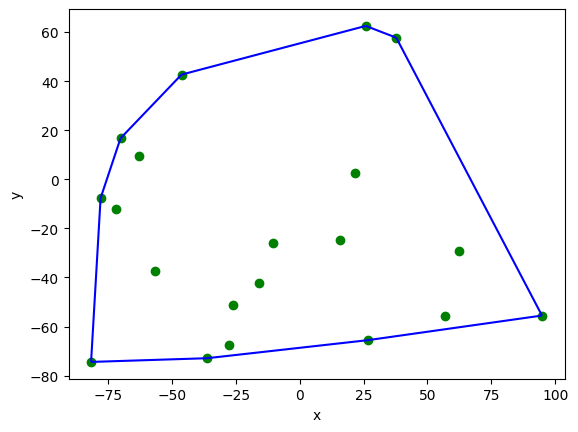

In [71]:
draw_example_1()

# Generowanie punktów na płaszczyźnie

Generowanie unkalnych losowych punktów w przestrzeni 2D w obrębie kwadratu

In [66]:
def generate_uniform_points(left=-100, right=100, n=100):
    random.seed()
    points = set()
    for i in range(n):
        while True:
            x = random.uniform(left,right)
            y = random.uniform(left,right)
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)
        
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym
    obszarze od left do right (jednakowo na osi y)
    o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
             np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    raise Exception("Unimplemented")

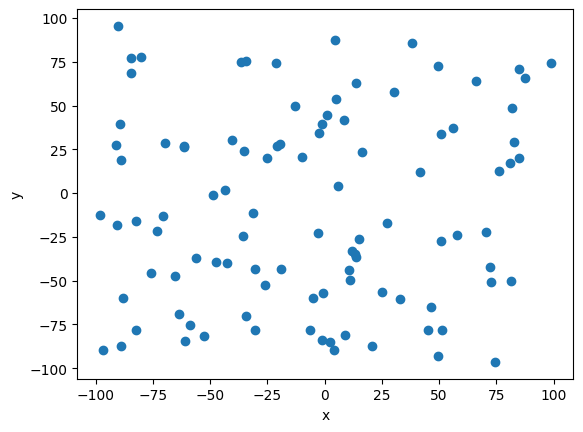

In [67]:
vis.clear()
vis.add_point(generate_uniform_points())
vis.show()

Generowanie równomiernie rozłożonych punktów w przestrzeni 2D leżących na okręgu

In [68]:
def generate_circle_points(O = (0,0), R = 10, n=100):
    random.seed()
    points = set()
    for i in range (n):
        while True:
            t = random.uniform(0,n) * np.pi * 2 / n
            x = R*np.cos(t)
            y = R*np.sin(t)
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    raise Exception("Unimplemented")

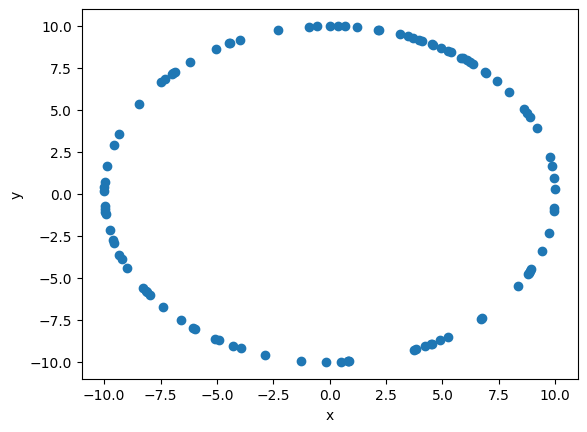

In [69]:
vis.clear()
vis.add_point(generate_circle_points())
vis.show()

Generowanie unikalnych losowych punktów w przestrzeni 2D leżących na obwodzie prostokąta

In [70]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    random.seed()
    points = set()
    edge = c[0]-a[0]
    for i in range (n):
        while True:
            dist=random.uniform(0,edge*4)
            if dist<edge:
                x=a[0]
                y=dist+a[1]
            elif dist<edge*2:
                x=dist-edge+d[0]
                y=d[1]
            elif dist<edge*3:
                x=b[0]
                y=dist-(edge*2)+b[1]
            else:
                x=dist-(edge*3)+a[0]
                y=a[1]
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)
            
    
    '''
    Funkcja generuje n punktów na obwodzie prostokąta
    o wierzchołkach w punktach a, b, c i d
    :param a: lewy-dolny wierzchołek prostokąta
    :param b: prawy-dolny wierzchołek prostokąta
    :param c: prawy-górny wierzchołek prostokąta
    :param d: lewy-górny wierzchołek prostokąta
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    raise Exception("Unimplemented")


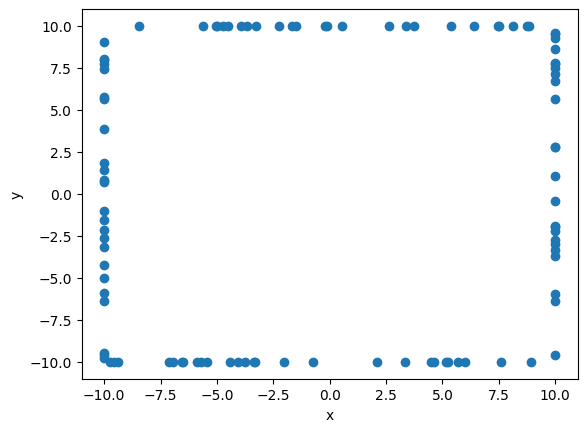

In [71]:
vis.clear()
vis.add_point(generate_rectangle_points())
vis.show()

Generowanie punktów w przestrzeni 2D w następujący sposób: 
1) po tyle samo unikalnych losowych punktów na dwóch bokach kwadratu leżących na osiach, które nie są jednocześnie wierzchołkami tego kwadratu
2) po tyle samo uikalnych losowych punktów na przekątnych kwadratu, które nie są jednocześnie wierzchołkami tego kwadratu
3) punkty stanowiące wierzczhołki tego kwadratu

In [72]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=25, diag_n=20):
    random.seed()
    points = set()
    points.add(a)
    points.add(b)
    points.add(c)
    points.add(d)
    for i in range (axis_n):
        while True:
            x = a[0]
            y = random.uniform(a[1],d[1])
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    for i in range (axis_n):
        while True:
            x = random.uniform(a[0],b[0])
            y = a[0]
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    for i in range (diag_n):
        while True:
            x = random.uniform(a[0],c[0])
            y = x
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    for i in range (diag_n):
        while True:
            x = random.uniform(d[0],b[0])
            y = 10-x
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)
    
    
    '''
    Funkcja generuje axis_n punktów na dwóch bokach kwadratu
    leżących na osiach x i y oraz diag_n punktów na
    przektąnych kwadratu, którego wyznaczają punkty
    a, b, c i d.
    :param a: lewy-dolny wierzchołek kwadratu
    :param b: prawy-dolny wierzchołek kwadratu
    :param c: prawy-górny wierzchołek kwadratu
    :param d: lewy-górny wierzchołek kwadratu
    :param axis_n: ilość generowanych punktów na każdym
                   z dwóch boków kwadratu równoległych do osi x i y
    :param diag_n: ilość generowanych punktów na każdej
                   przekątnej kwadratu
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    raise Exception("Unimplemented")

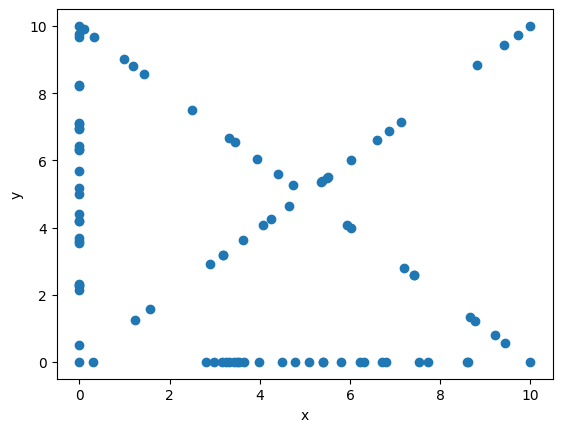

In [73]:
vis.clear()
vis.add_point(generate_square_points())
vis.show()

Generowanie punktów w przestrzeni 2D w następujący sposób:
1) unikalne losowe punkty w obrębie kwadraratu o środku w punkcie (0,0)
2) równomiernie rozłożone punkty na okręgu o środku w punkcie (0,0), którego promień w stosunku do długości boku kwadratu wynosi 1.5

In [85]:
def even_circle_points(O, R, n):
    points=[]
    step = 1/n
    for i in range (n):
        t = step * i
        x = R*np.cos(t*np.pi*2)
        y = R*np.sin(t*np.pi*2)
        points.append((x,y))
    return points

In [127]:
def set_convex_hull(inside = 10, outside = 5, size_of_square = 20):
    new_points=generate_uniform_points(-size_of_square/2, size_of_square/2, inside)
    new_points.extend(even_circle_points((0, 0), size_of_square*1.5, outside))
    new_points=random.sample(new_points,len(new_points))
    return new_points

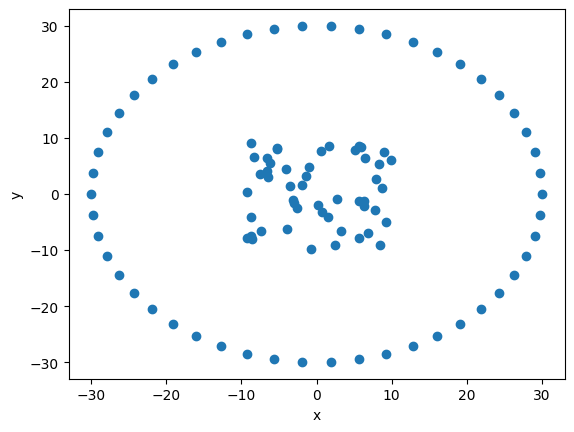

In [128]:
vis.clear()
vis.add_point(set_convex_hull(inside = 50, outside = 50))
vis.show()

Dowód na to, że żaden z punktów wewnętrznych nie będzie stanwił części otoczki wypukłej. Nawet jeśli liczba punktów zewnętrznych wyniesie 3

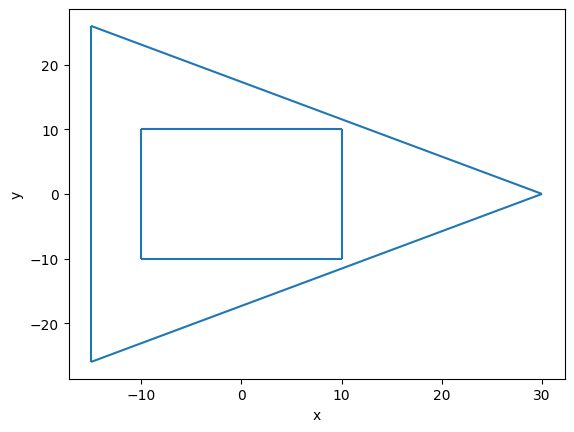

In [89]:
vis.clear()
a=[(-10,-10),(-10,10),(10,10),(10,-10)]
b=even_circle_points((0, 0), 30, 3)
vis.add_line_segment([(a[i], a[i+1]) for i in range(len(a)-1)])
vis.add_line_segment([a[-1], a[0]])
vis.add_line_segment([(b[i], b[i+1]) for i in range(len(b)-1)])
vis.add_line_segment([b[-1], b[0]])
vis.show()

Generowanie własnego zbioru punktów

In [38]:
def Position_changer(points):
    new_points = []
    for i in range (len(points)):
        new_point = (points[i][0], -points[i][1]+550)
        new_points.append(new_point)
    return new_points


def Set_sections_using_mouse():    
    pygame.init()
    
    SCREEN_WIDTH=800
    SCREEN_HEIGHT=600
    
    screen=pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    
    points=[]
    run=True
    
    while run:
        buttom=pygame.Rect((0,560,120,40))
        pygame.draw.rect(screen, (255,0,0), buttom)
        font = pygame.font.SysFont(None, 24)
        img = font.render('End', True, (255,255,255))
        screen.blit(img, (40, 570))
        empty_space=pygame.Rect((120,560,680,40))
        pygame.draw.rect(screen, (255,255,255), empty_space)
        
        for event in pygame.event.get():
            if event.type==pygame.QUIT:
                points.clear()
                run=False
            if event.type == pygame.MOUSEBUTTONUP:
                pos = pygame.mouse.get_pos()
                if 0<=pos[0]<=120 and 560<pos[1]<=600:
                    run=False
                    time.sleep(0.5)
                    break
                elif pos[1]<=560:
                    pygame.draw.circle(screen,(255,0,0),pos,5)
                    points.append(pos)
    
        pygame.display.update()
    
    pygame.quit()
    
    points = Position_changer(points)
    return points

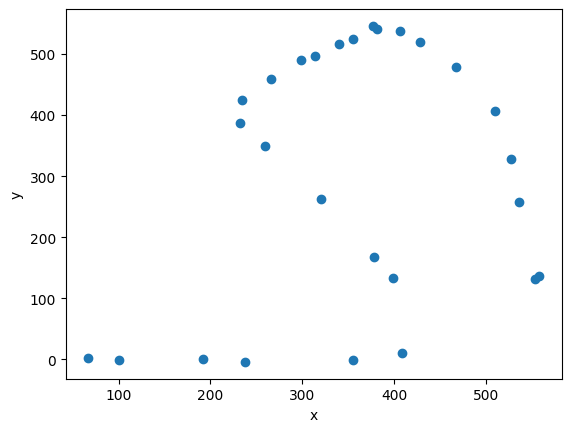

In [40]:
#Zamknięcie programu przyciskiem "x" spowoduje zwtócenie pustej tablicy
vis.clear()
vis.add_point(Set_sections_using_mouse())
vis.show()

Zapisz punkty w pliku CSV

In [63]:
def save_points_to_csv(points, filename):
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerows(points)

In [64]:
points = [(1, 0), (0, 1), (1, 2), (2, 1), (1, 1)]
save_points_to_csv(points, 'points.csv')

Wczytaj punkty z pliku CSV

In [65]:
def read_points_from_csv(filename):
    points = []
    with open(filename, 'r') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            point = tuple(map(float, row))
            points.append(point)
    return points

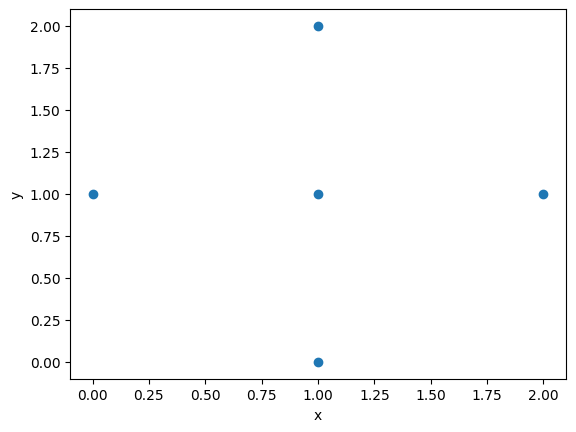

In [66]:
filename = 'points.csv'
read_points = read_points_from_csv(filename)
vis.clear()
vis.add_point(read_points)
vis.show()

# Algorytmy

## Algorytm Grahama

In [121]:
def Start_point (Q):
    start=Q[0]
    start_idx=0
    for i in range (1,len(Q)):
        if Q[i][1]<start[1]:
            start=Q[i]
            start_idx=i
        elif Q[i][1]==start[1]:
            if Q[i][0]<start[0]:
                start=Q[i]
                start_idx=i
    return start,start_idx


def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def further (a,b,c):
    if a[0]==b[0]:
        if abs(a[1]-b[1])>abs(a[1]-c[1]):
            return True
        else:
            return False
    else:
        if abs(a[0]-b[0])>abs(a[0]-c[0]):
            return True
        else:
            return False


def ComparePoints(a,b):
    first=a[1]
    second=a[0]
    third=b[0]
    orientation=orient(first,second,third)
    if orientation>0 or (orientation==0 and further(first,second,third)==True):
        return -1
    else:
        return 1
    

def Sort_points (Q,start,start_idx):
    if len(Q)==1: return Q,[]
    K=copy.deepcopy(Q)
    K.pop(start_idx)    
    K_with_start=[]
    for i in range (len(K)):
        K_with_start.append((K[i],Q[start_idx]))
    K_with_start=sorted(K_with_start, key=functools.cmp_to_key(ComparePoints))
    for i in range (len(K_with_start)):
        K[i]=K_with_start[i][0]
    Q_sorted=[Q[start_idx],K[0]]
    Q_eliminated=[]
    for i in range (1,len(K)):
        if orient(Q[start_idx],K[i],K[i-1])==0:
            Q_eliminated.append(K[i])
        else:
            Q_sorted.append(K[i])
    return Q_sorted, Q_eliminated


def Less_than_4(Q,eliminated):
    convex_hull=[]
    if len(eliminated)==0:
        return Q,convex_hull
    else:
        for i in range (len(Q)):
            if eliminated[0]!=Q[i]:
                convex_hull.append(Q[i])
        return convex_hull,eliminated


def Get_convex_hull(Q,eliminated):
    not_convex_hull=eliminated.copy()
    convex_hull=[Q[0],Q[1],Q[2]]
    i=3
    t=2
    while i<len(Q):
        if orient(convex_hull[t-1],convex_hull[t],Q[i])>0:
            convex_hull.append(Q[i])
            t+=1
            i+=1
        else:
            not_convex_hull.append(convex_hull[-1])
            convex_hull.pop()
            t-=1
    return convex_hull,not_convex_hull



def graham_algorithm(Q, all_points=False):
    start,start_idx=Start_point(Q)
    Q,eliminated=Sort_points(Q,start,start_idx)
    if len(Q)<4:
        convex_hull,rest=Less_than_4(Q,eliminated)
    else:
        convex_hull,rest=Get_convex_hull(Q,eliminated)
    if all_points==False:
        return convex_hull
    else:
        return convex_hull,rest
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    raise Exception("Unimplemented")

In [103]:
Test().runtest(2, graham_algorithm)

Lab 2, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 26.562s


In [122]:
def Start_point (Q):
    start=Q[0]
    start_idx=0
    for i in range (1,len(Q)):
        if Q[i][1]<start[1]:
            start=Q[i]
            start_idx=i
        elif Q[i][1]==start[1]:
            if Q[i][0]<start[0]:
                start=Q[i]
                start_idx=i
    return start,start_idx


def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def further (a,b,c):
    if a[0]==b[0]:
        if abs(a[1]-b[1])>abs(a[1]-c[1]):
            return True
        else:
            return False
    else:
        if abs(a[0]-b[0])>abs(a[0]-c[0]):
            return True
        else:
            return False


def ComparePoints(a,b):
    first=a[1]
    second=a[0]
    third=b[0]
    orientation=orient(first,second,third)
    if orientation>0 or (orientation==0 and further(first,second,third)==True):
        return -1
    else:
        return 1
    

def Sort_points (Q,start,start_idx):
    if len(Q)==1: return Q,[]
    K=copy.deepcopy(Q)
    K.pop(start_idx)    
    K_with_start=[]
    for i in range (len(K)):
        K_with_start.append((K[i],Q[start_idx]))
    K_with_start=sorted(K_with_start, key=functools.cmp_to_key(ComparePoints))
    for i in range (len(K_with_start)):
        K[i]=K_with_start[i][0]
    Q_sorted=[Q[start_idx],K[0]]
    Q_eliminated=[]
    for i in range (1,len(K)):
        if orient(Q[start_idx],K[i],K[i-1])==0:
            Q_eliminated.append(K[i])
        else:
            Q_sorted.append(K[i])
    return Q_sorted, Q_eliminated


def Draw_sorted_points(Q):
    start,start_idx=Start_point(Q)
    green,red=Sort_points(Q,start,start_idx)
    vis.clear()
    vis.add_line_segment([(green[i], Q[start_idx]) for i in range(len(green))])
    vis.add_point(green, color=['green'])
    vis.add_point(red, color=['red'])
    vis.add_point(Q[start_idx], color=['purple'])
    vis.show()
    return green,red


def Less_than_4_draw(Q,not_convex_hull):
    vis.clear()
    if len(not_convex_hull)==0:
        convex_hull=Q.copy()
    else:
        convex_hull=[]
        for i in range (len(Q)):
            if not_convex_hull[0]!=Q[i]:
                convex_hull.append(Q[i])
    if len(convex_hull)==3:
        vis.add_line_segment([(Q[0], Q[1]),(Q[1], Q[2]),(Q[2], Q[0])] , color=['blue'])
    elif len(convex_hull)==2:
        vis.add_line_segment([(Q[0], Q[1])] , color=['blue'])
    vis.add_point(convex_hull, color=['blue'])
    if len(not_convex_hull)!=0:
        vis.add_point(not_convex_hull, color=['orange'])
    vis.show()


def Vis_hull_graham(convex_hull,not_convex_hull,Q,to_start,is_good=False,start=False,last=False):
    vis.clear()
    if start==True:
        vis.add_line_segment([(convex_hull[i], convex_hull[i+1]) for i in range(2)], color=['blue'])
        vis.add_point(convex_hull, color=['blue'])
    elif last==True:
        vis.add_line_segment([(convex_hull[i], convex_hull[i+1]) for i in range(len(convex_hull)-1)], color=['blue'])
        vis.add_line_segment([(convex_hull[len(convex_hull)-1], convex_hull[0])], color=['blue'])
        vis.add_point(convex_hull, color=['blue'])
    else:
        vis.add_line_segment([(convex_hull[i], convex_hull[i+1]) for i in range(len(convex_hull)-2)], color=['blue'])
        vis.add_point(convex_hull[:-1], color=['blue'])
        if is_good==True:
            vis.add_line_segment([(convex_hull[-2], convex_hull[-1]),(convex_hull[-1], Q[to_start])] , color=['green'])
            vis.add_point([convex_hull[-1]], color=['green'])
        else:
            vis.add_line_segment([(convex_hull[-2], convex_hull[-1]),(convex_hull[-1],  Q[to_start])] , color=['red'])
            vis.add_point([convex_hull[-1]], color=['red'])
        vis.add_point([Q[to_start]], color=['purple'])
    vis.add_point(not_convex_hull, color=['orange'])
    if to_start<len(Q)-1:
        vis.add_point(Q[to_start+1:], color=['black'])
    vis.show()
    

def Draw_convex_hull(Q,eliminated):
    not_convex_hull=eliminated.copy()
    if len(Q)<4:
        Less_than_4_draw(Q,not_convex_hull)
    else:
        convex_hull=[Q[0],Q[1],Q[2]]
        i=3
        t=2
        Vis_hull_graham(convex_hull,not_convex_hull,Q,i-1,start=True)
        while i<len(Q):
            if orient(convex_hull[t-1],convex_hull[t],Q[i])>0:
                Vis_hull_graham(convex_hull,not_convex_hull,Q,i,is_good=True)
                convex_hull.append(Q[i])
                t+=1
                i+=1
            else:
                Vis_hull_graham(convex_hull,not_convex_hull,Q,i,is_good=False)
                not_convex_hull.append(convex_hull[-1])
                convex_hull.pop()
                t-=1
        Vis_hull_graham(convex_hull,not_convex_hull,Q,i,last=True)

def graham_algorithm_draw(Q):
    green,red = Draw_sorted_points(Q)
    Draw_convex_hull(green,red)

    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama oraz
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''

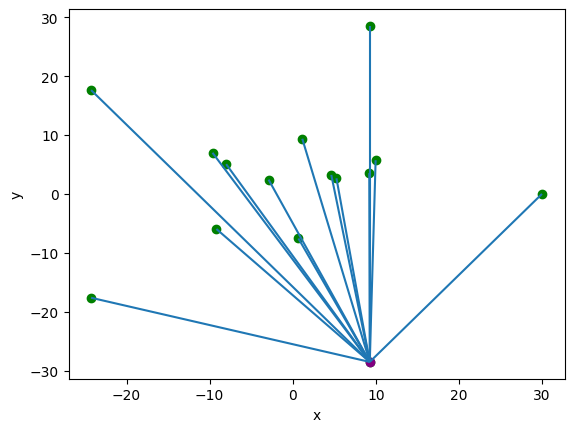

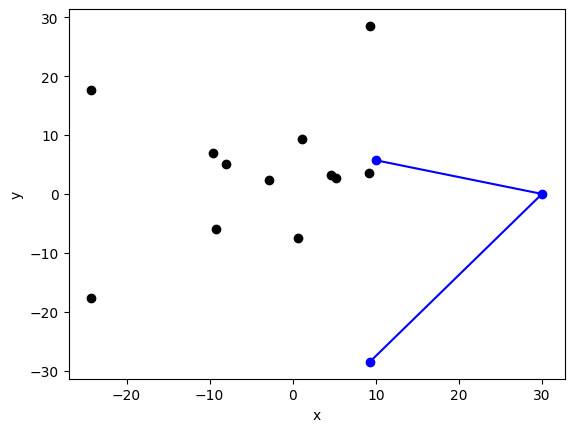

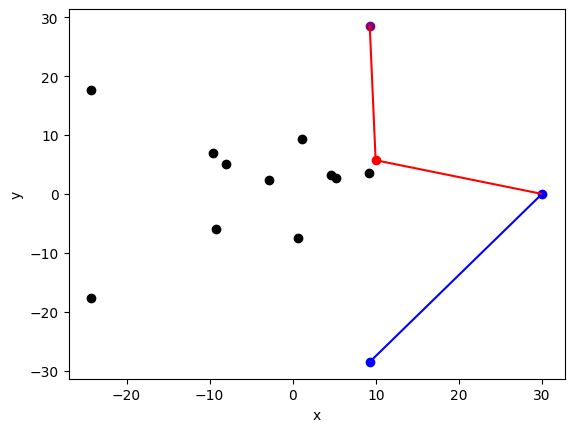

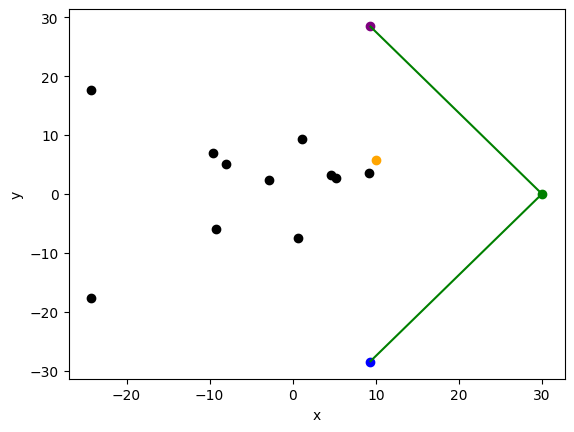

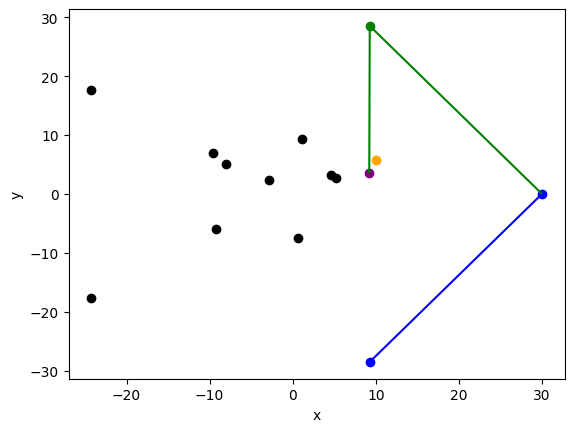

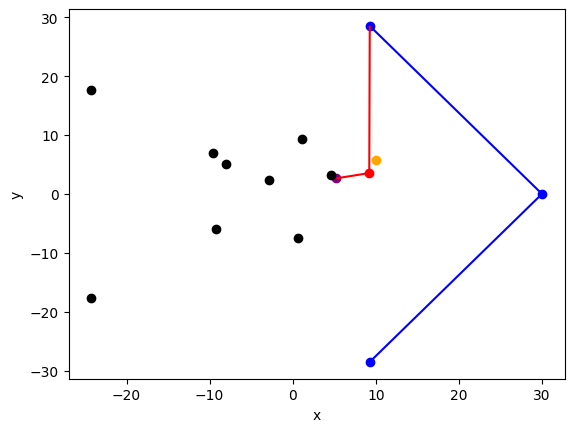

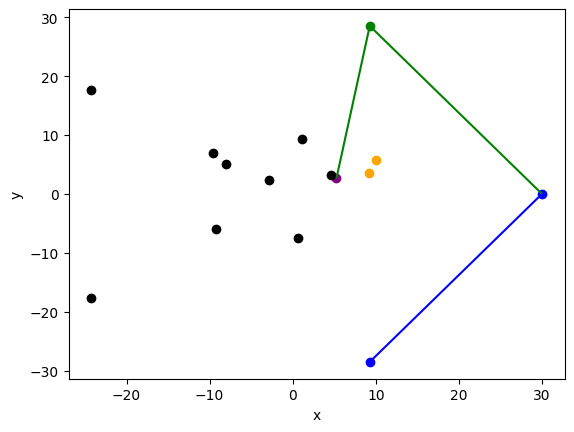

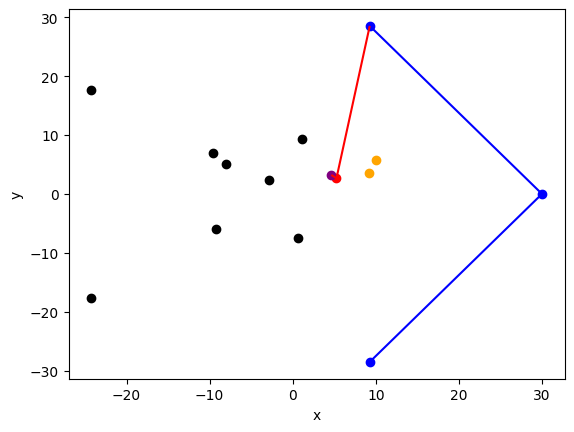

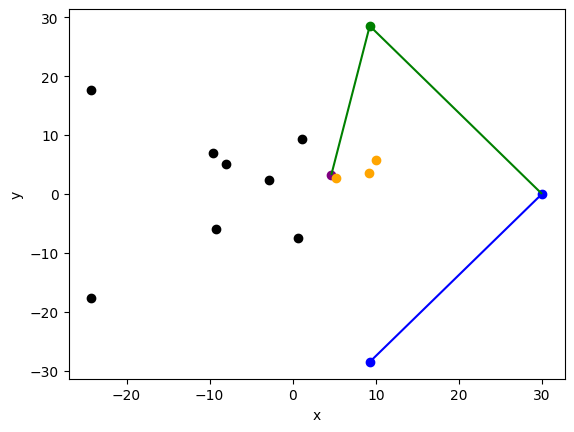

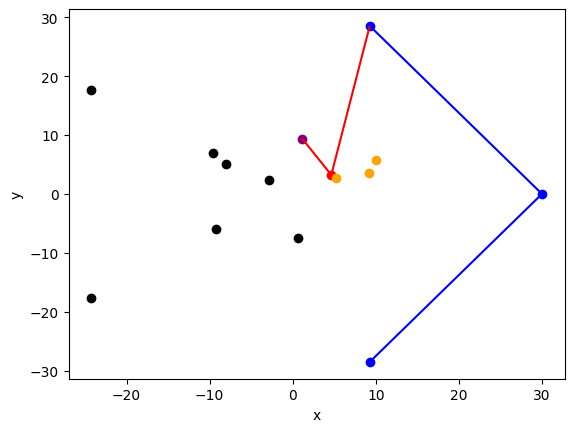

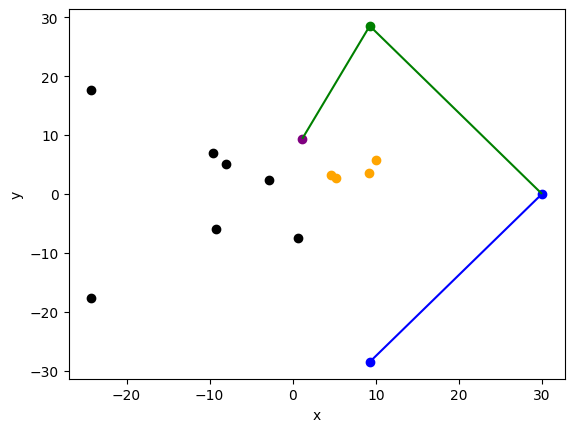

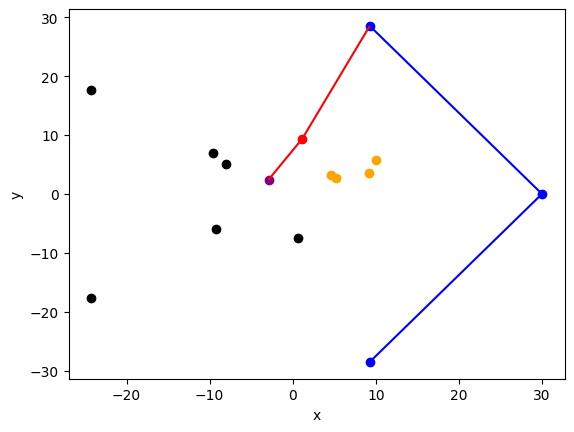

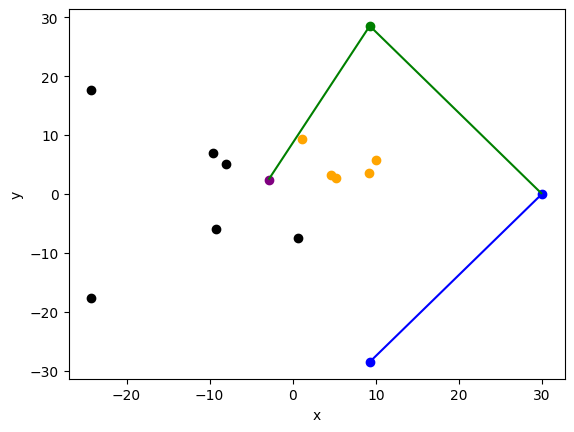

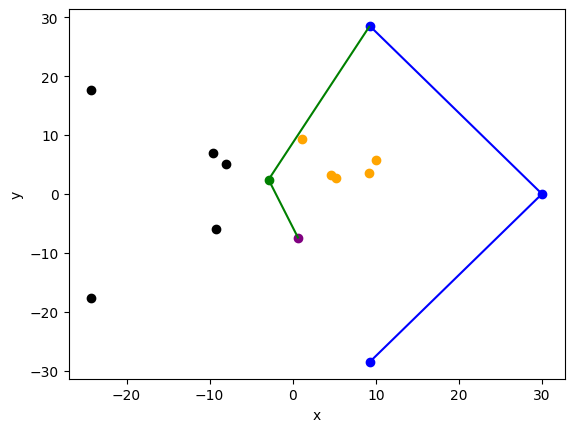

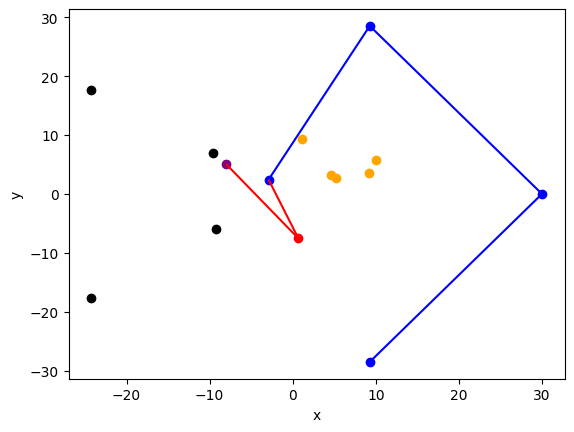

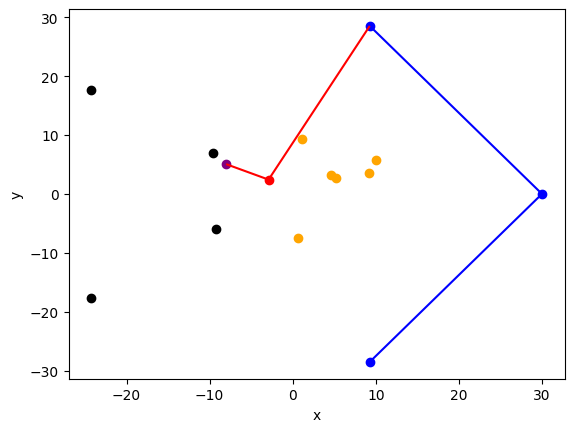

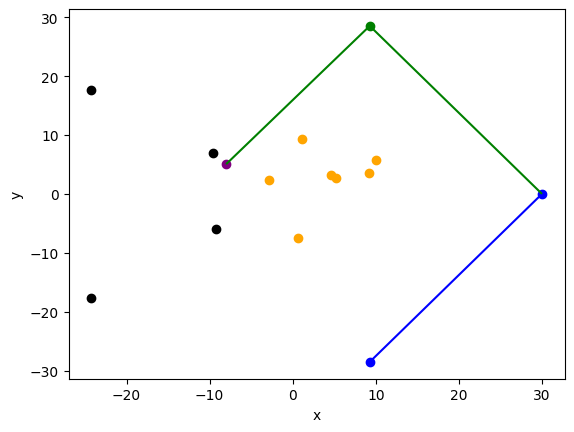

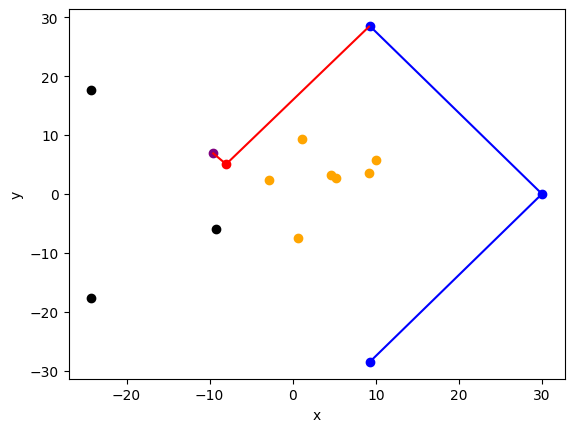

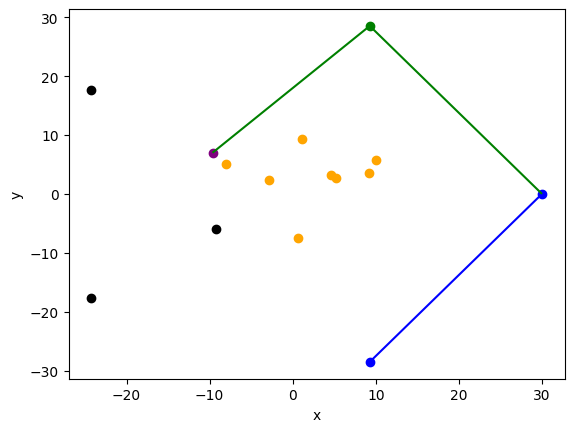

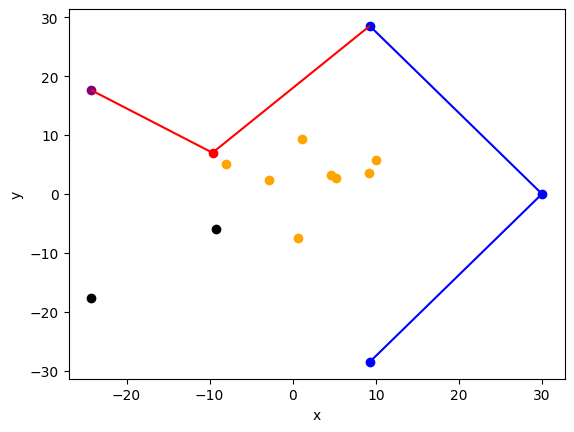

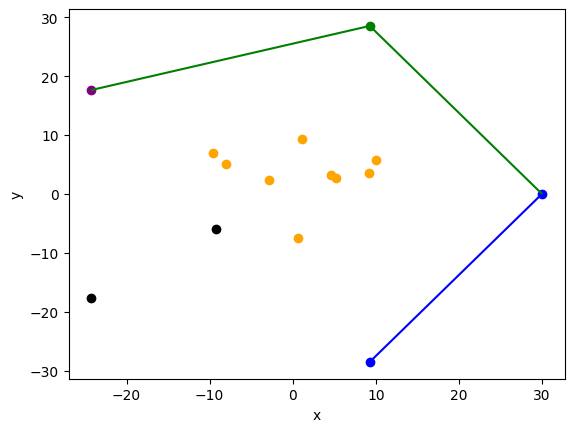

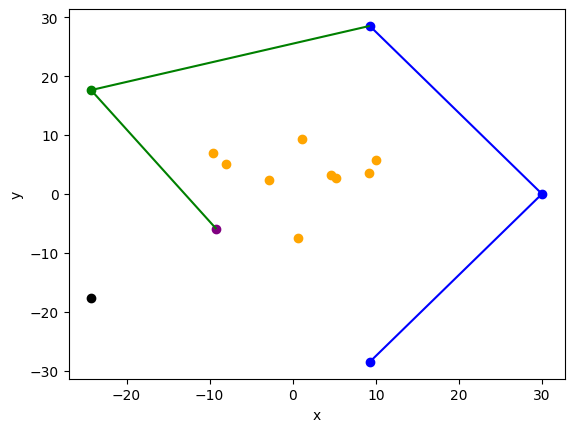

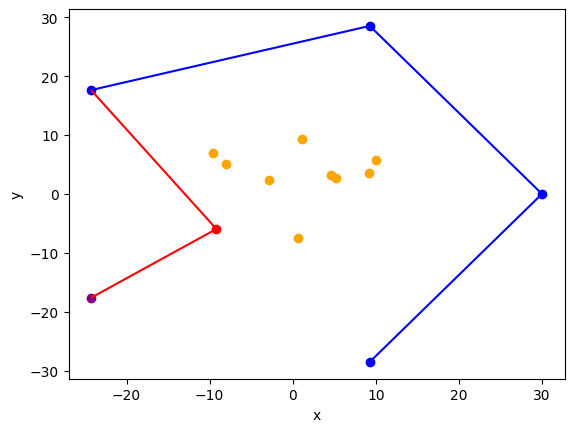

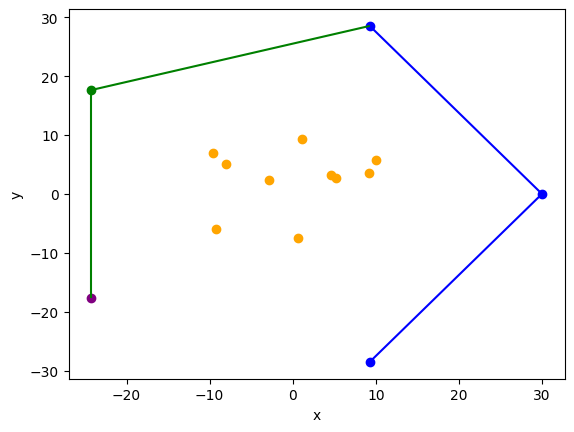

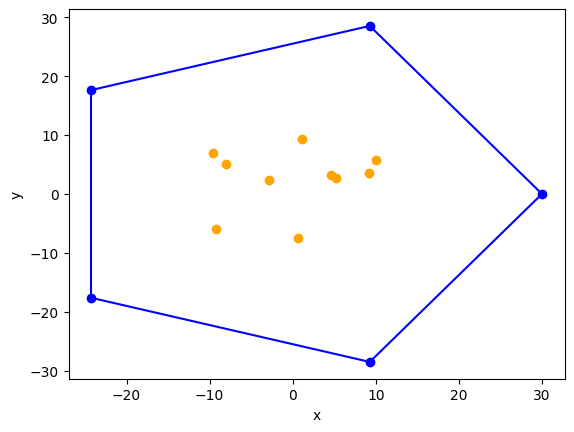

In [129]:
graham_algorithm_draw(set_convex_hull())

## Algorytm Jarvisa

In [124]:
def Start_point (Q):
    # Jedynie dla lepszej wizualizacji
    start=Q[0]
    start_idx=0
    for i in range (1,len(Q)):
        if Q[i][1]<start[1]:
            start=Q[i]
            start_idx=i
        elif Q[i][1]==start[1]:
            if Q[i][0]<start[0]:
                start=Q[i]
                start_idx=i
    return start,start_idx


def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def further (a,b,c):
    if a[0]==b[0]:
        if abs(a[1]-b[1])>abs(a[1]-c[1]):
            return True
        else:
            return False
    else:
        if abs(a[0]-b[0])>abs(a[0]-c[0]):
            return True
        else:
            return False



def jarvis_algorithm(Q,all_points=False):
    if len(Q)==1:
        if all_points==True:
            return Q, []
        else:
            return Q
    last,last_idx=Start_point(Q)
    hull=[]
    is_on_hull=[False for _ in range (len(Q))]
    not_hull=[]
    if len(Q)==2:
        hull.append(last)
        hull.append(Q[abs(last_idx-1)])
        if all_points==True:
            return hull, not_hull
    else:
        while True:
            hull.append(last)
            is_on_hull[last_idx]=True
            if last_idx==0:
                next_point=Q[1]
                next_point_idx=1
            else:
                next_point=Q[0]
                next_point_idx=0
            for i in range (len(Q)):
                if i!=last_idx and i!=next_point_idx:
                    orientation=orient(last,next_point,Q[i])
                    if orientation<0 or (orientation==0 and further(last,next_point,Q[i])==False):
                        next_point=Q[i]
                        next_point_idx=i
            last=next_point
            last_idx=next_point_idx
            if last==hull[0]:
                break
    for i in range (len(Q)):
        if is_on_hull[i]==False:
            not_hull.append(Q[i])
    if all_points==True:
        return hull, not_hull
    else:
        return hull
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    raise Exception("Unimplemented")

In [119]:
Test().runtest(2, jarvis_algorithm)

Lab 2, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 55.094s


In [123]:
def Vis_hull_jarvis(hull,Q,eliminated,first_idx,next_point_idx,check_point_idx,is_good=False,start=False,last=False):
    vis.add_point([Q[i] for i in range (len(Q))], color=['black'])
    vis.clear()
    if last==True:
        vis.add_line_segment([(hull[i], hull[i+1]) for i in range(len(hull)-1)], color=['blue'])
        vis.add_line_segment([(hull[len(hull)-1], hull[0])], color=['blue'])
        vis.add_point(hull[1:], color=['blue'])
        vis.add_point([Q[first_idx]], color=['purple'])
    elif start==False:
        vis.add_point([Q[first_idx]], color=['purple'])
        vis.add_line_segment([(hull[i], hull[i+1]) for i in range(len(hull)-1)], color=['blue'])
        vis.add_point(hull, color=['blue'])
        if is_good==True:
            vis.add_line_segment([(hull[-1], Q[next_point_idx]),(Q[next_point_idx], Q[check_point_idx])] , color=['green'])
            vis.add_point([Q[next_point_idx]], color=['green'])
        else:
            vis.add_line_segment([(hull[-1], Q[next_point_idx]),(Q[next_point_idx], Q[check_point_idx])] , color=['red'])
            vis.add_point([Q[next_point_idx]], color=['red'])
        vis.add_point([Q[check_point_idx]], color=['pink'])
    else:
        vis.add_point([Q[first_idx]], color=['purple'])
    vis.add_point([Q[i] for i in range (0,check_point_idx) if (eliminated[i]==False)], color=['orange'])
    vis.add_point([Q[i] for i in range (check_point_idx,len(Q)) if (eliminated[i]==False)], color=['black'])
    vis.show()


def jarvis_algorithm_draw(Q):
    vis.clear()
    if len(Q)==1:
        vis.add_point(Q, color=['blue'])
        vis.show()
    if len(Q)>1:
        last,last_idx=Start_point(Q)
        first_idx=last_idx
        hull=[]
    if len(Q)==2:
        hull.append(last)
        hull.append(Q[abs(last_idx-1)])
        vis.add_point(hull, color=['blue'])
        vis.add_line_segment((hull[0], hull[1]), color=['blue'])
        vis.show()
    if len(Q)>2:
        eliminated=[False for _ in range (len(Q))]
        eliminated[last_idx]=True
        is_on_hull=[False for _ in range (len(Q))]
        eliminated[last_idx]=True
        Vis_hull_jarvis(hull,Q,eliminated,first_idx,0,0,start=True)
        while True:
            hull.append(last)
            is_on_hull[last_idx]=True
            if last_idx==0:
                next_point=Q[1]
                next_point_idx=1
            else:
                next_point=Q[0]
                next_point_idx=0
            eliminated[next_point_idx]=True
            for i in range (len(Q)):
                if i!=last_idx and i!=next_point_idx:
                    orientation=orient(last,next_point,Q[i])
                    eliminated[i]=True
                    if orientation<0 or (orientation==0 and further(last,next_point,Q[i])==False):
                        Vis_hull_jarvis(hull,Q,eliminated,first_idx,next_point_idx,i,is_good=False)
                        if is_on_hull[next_point_idx]==False:
                            eliminated[next_point_idx]=False
                        next_point=Q[i]
                        next_point_idx=i
                    else:
                        Vis_hull_jarvis(hull,Q,eliminated,first_idx,next_point_idx,i,is_good=True)
                        if is_on_hull[i]==False:
                            eliminated[i]=False
            last=next_point
            last_idx=next_point_idx
            if last==hull[0]:
                break
        Vis_hull_jarvis(hull,Q,eliminated,first_idx,len(Q),0,last=True)

    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''


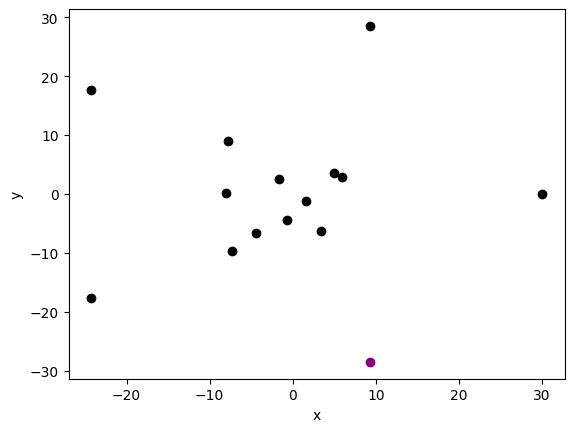

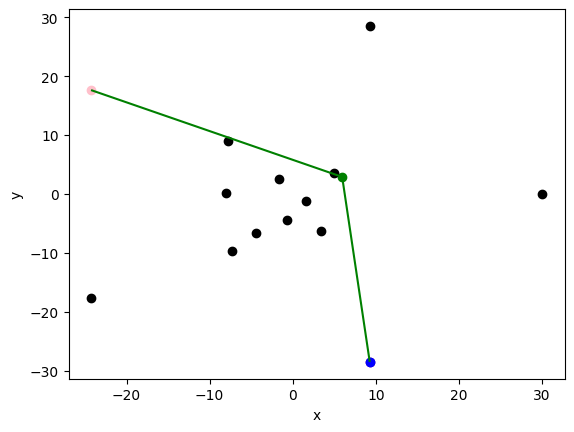

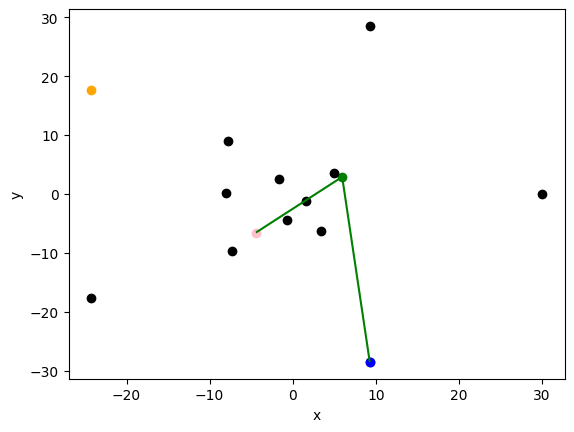

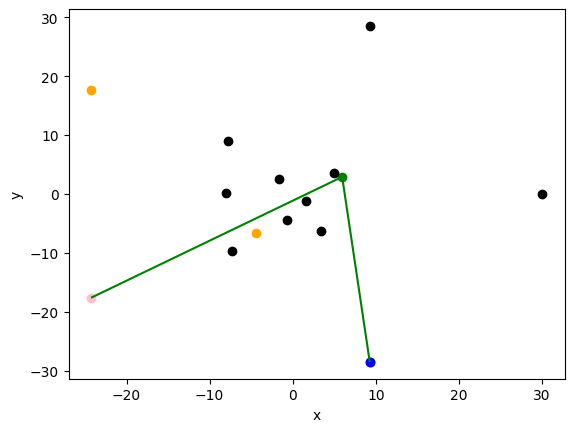

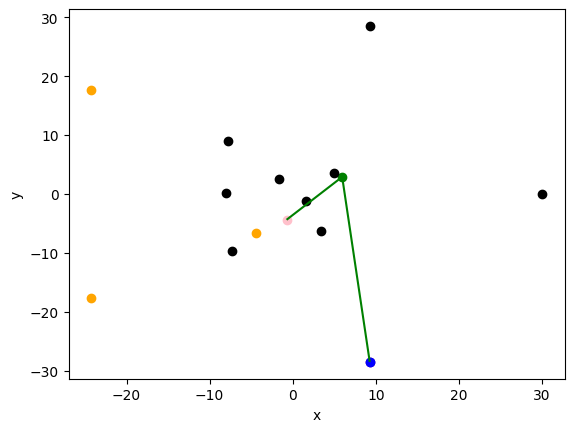

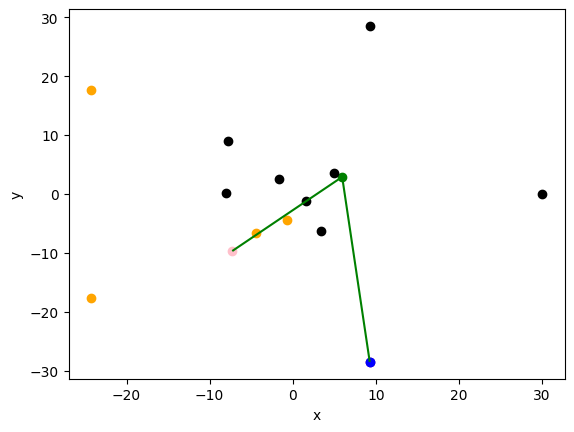

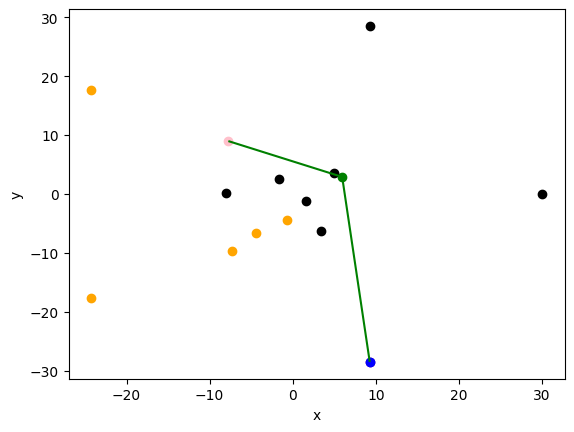

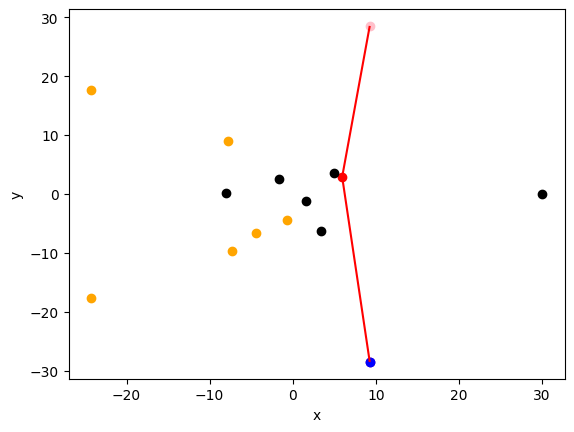

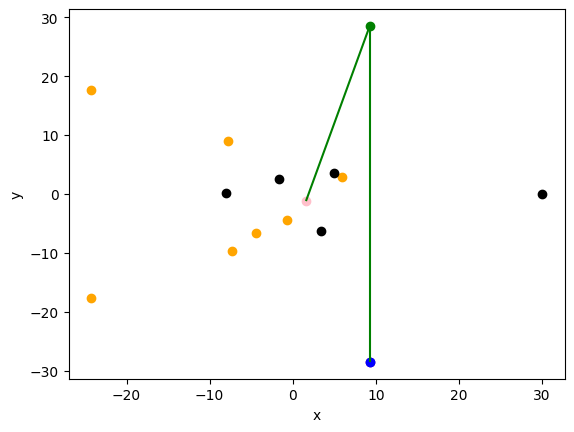

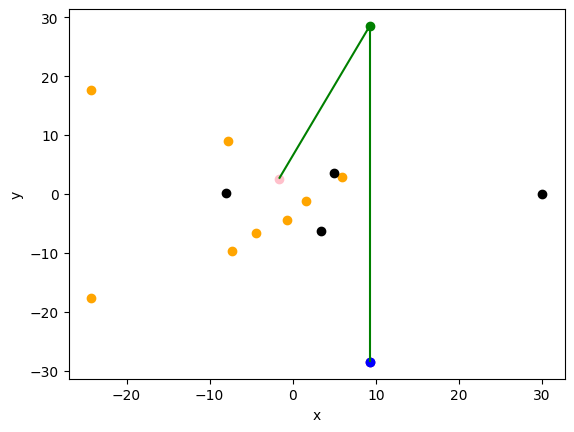

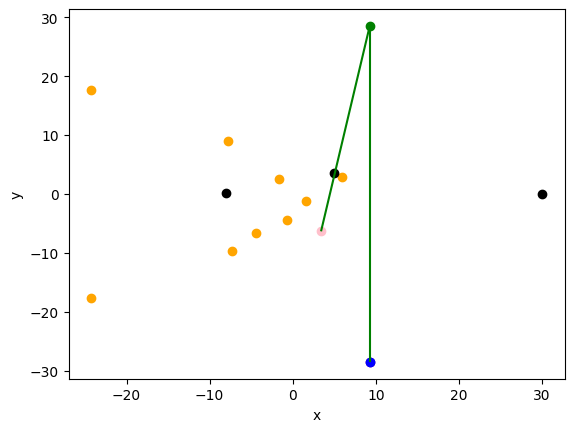

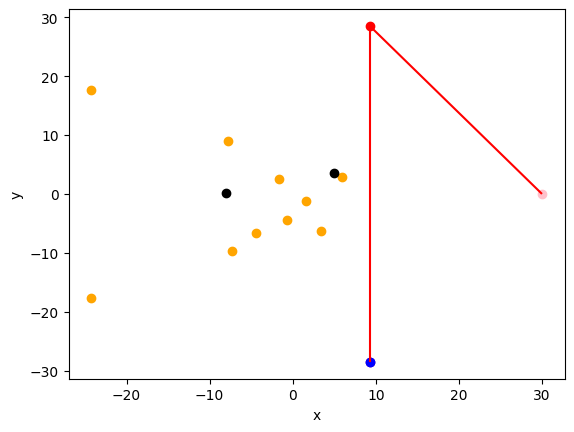

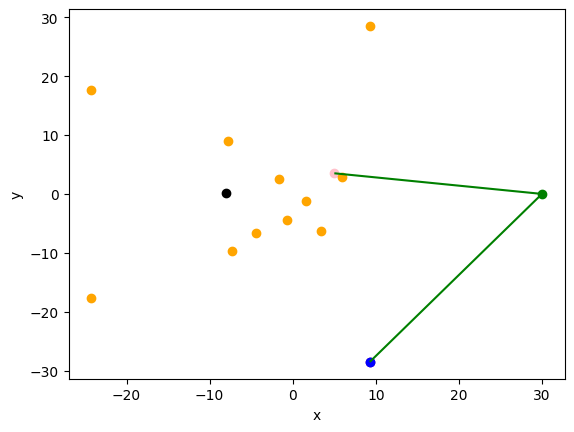

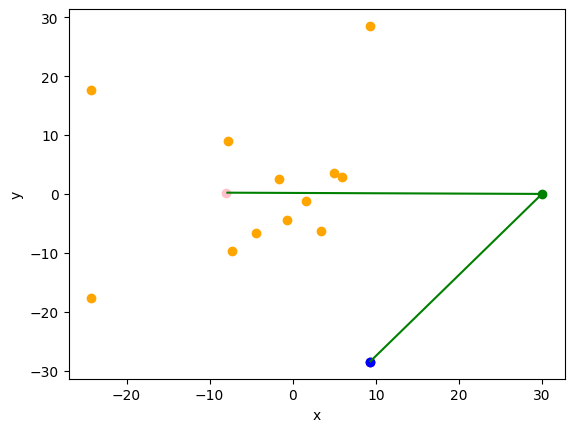

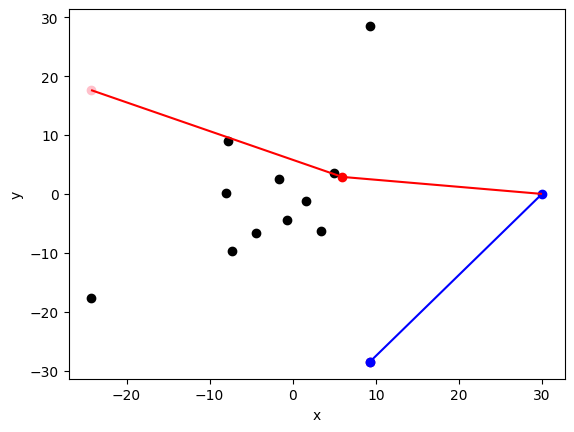

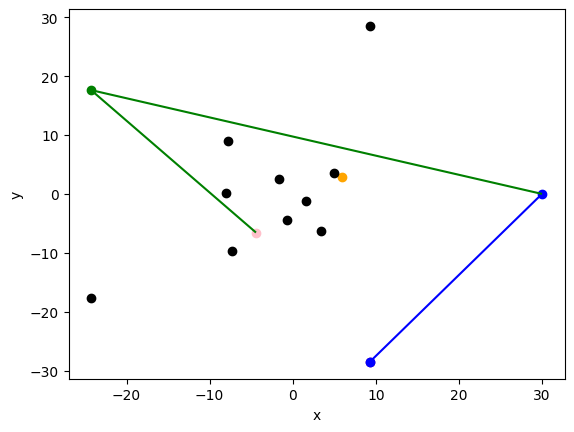

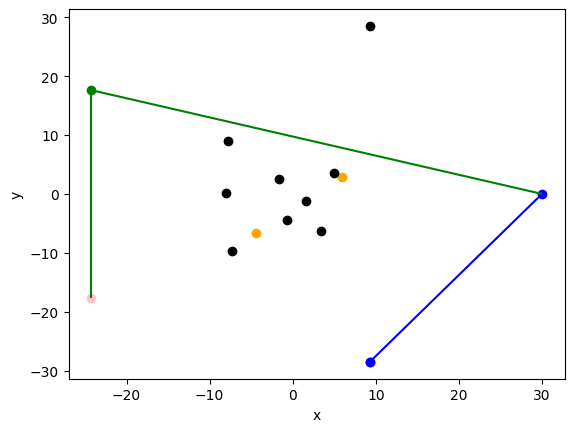

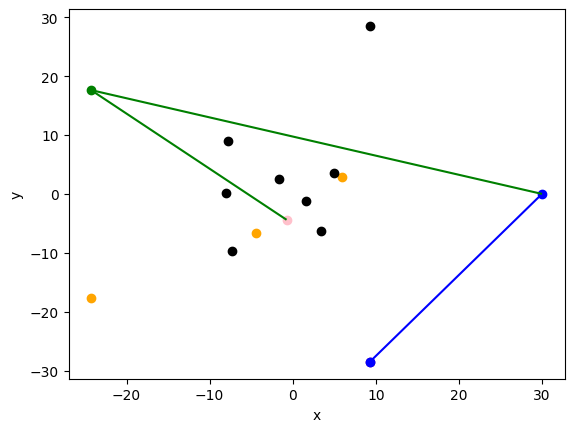

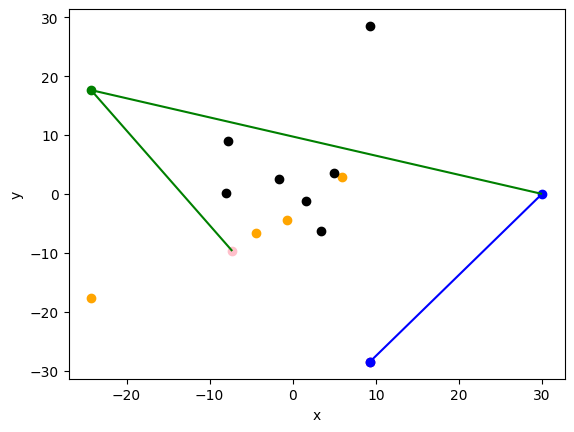

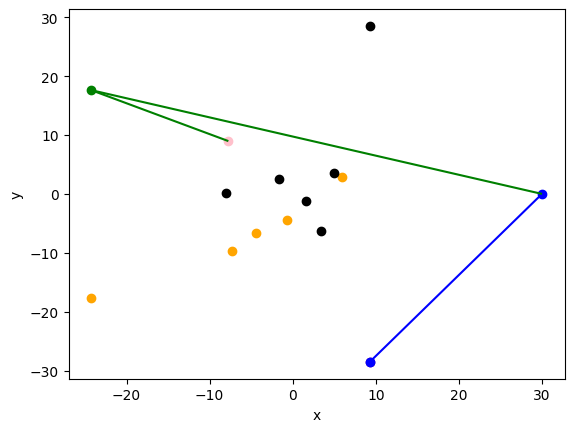

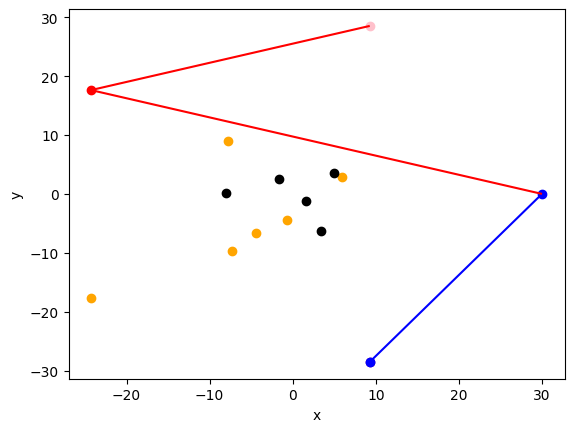

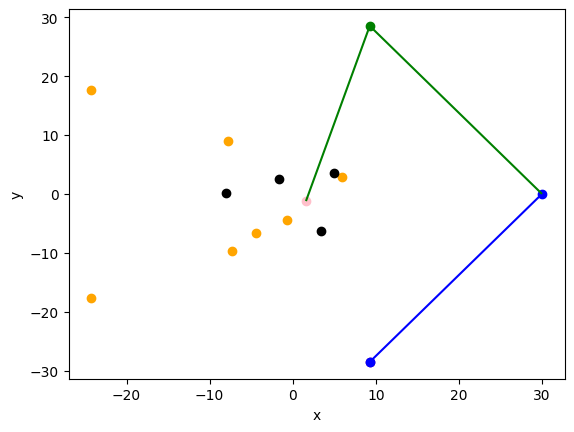

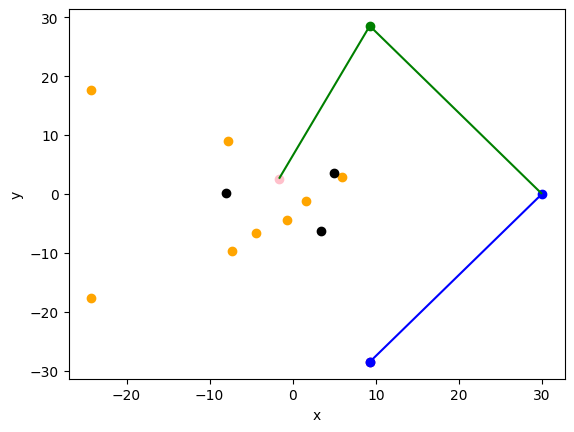

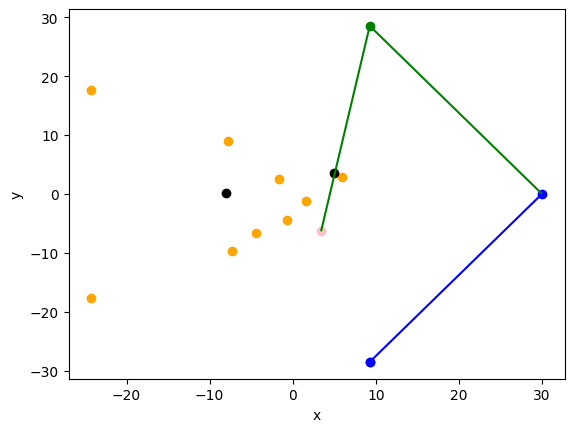

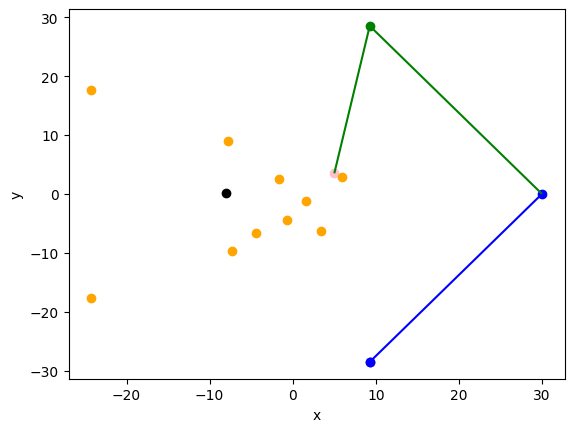

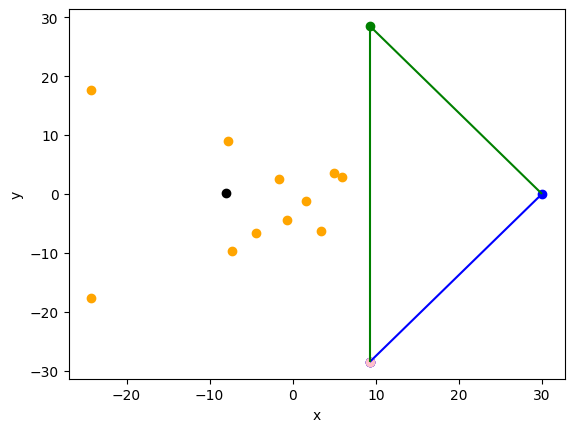

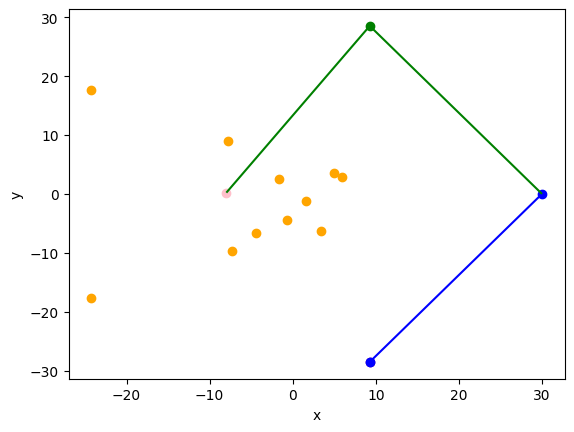

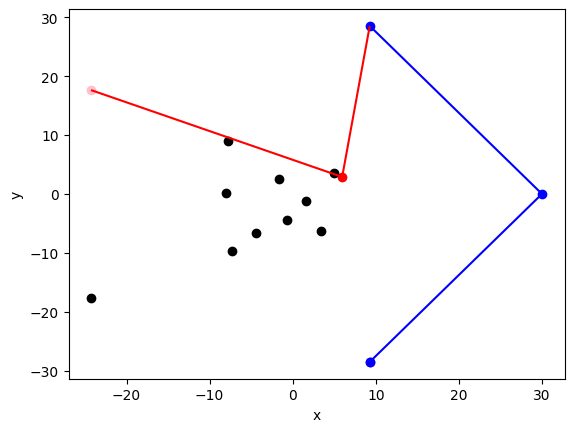

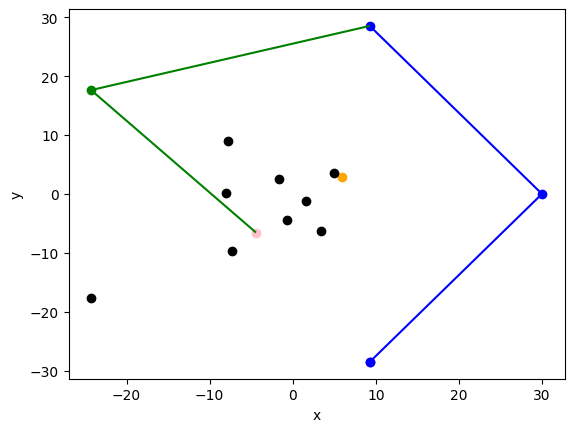

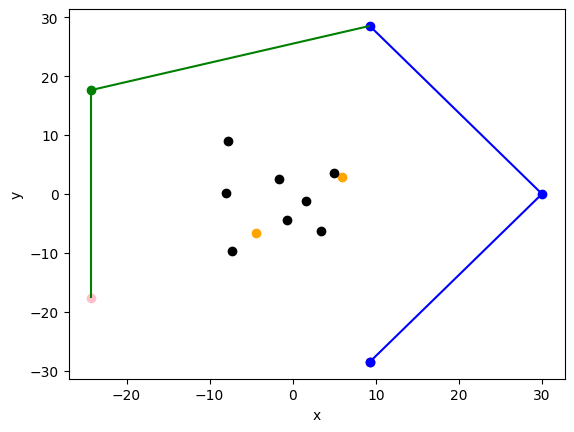

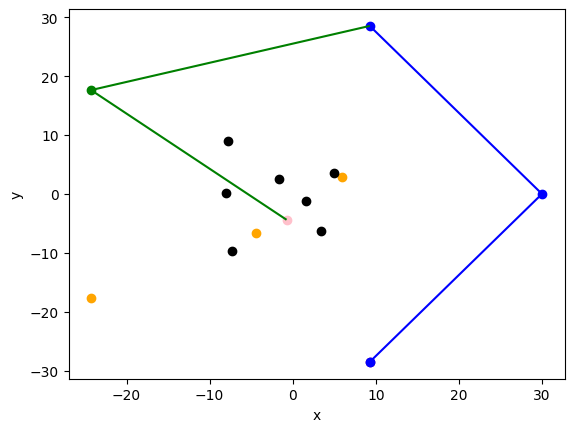

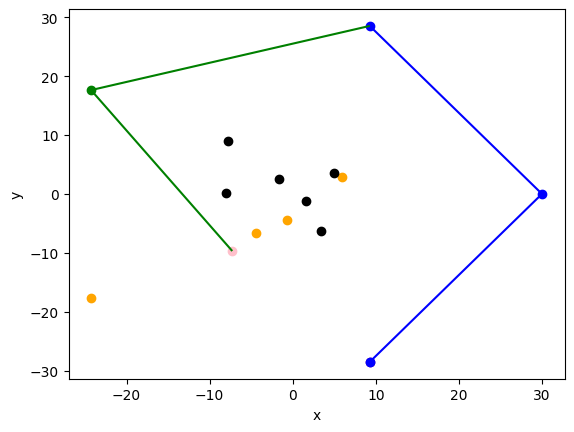

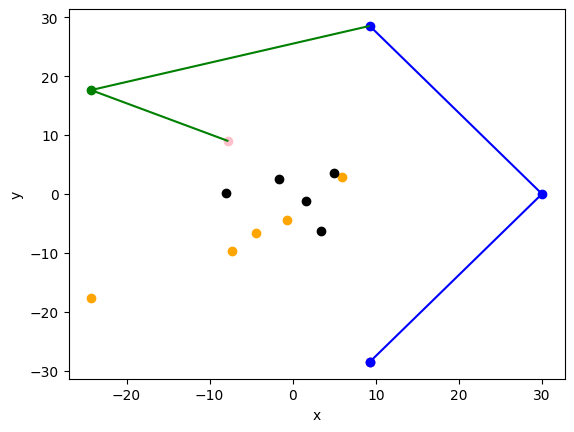

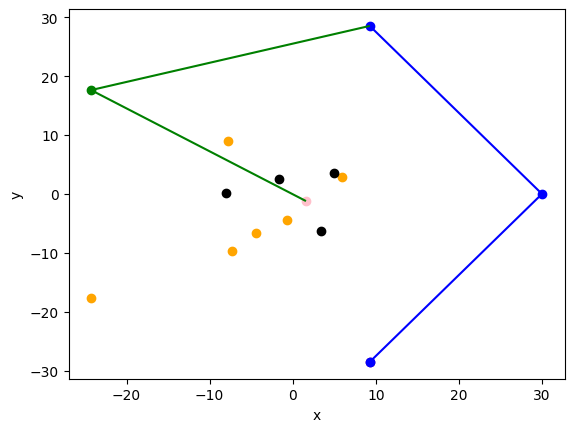

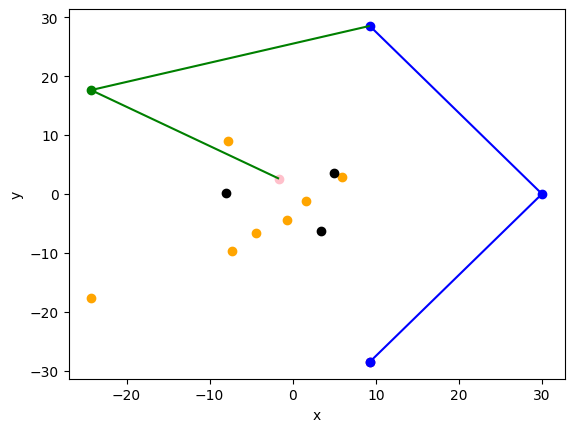

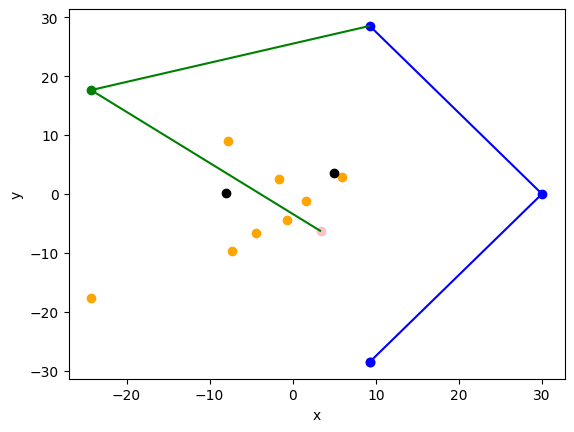

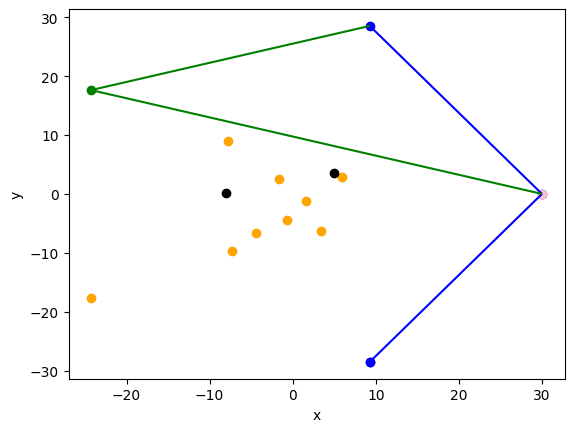

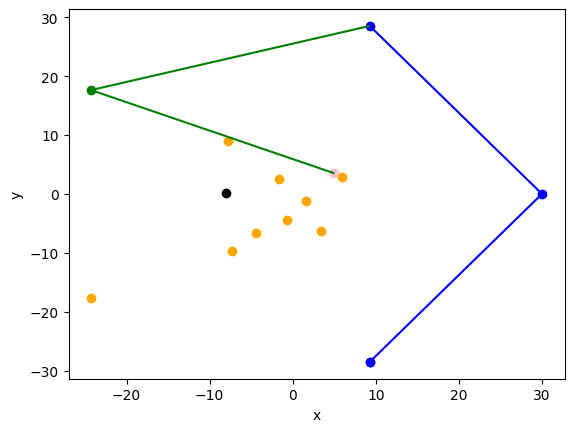

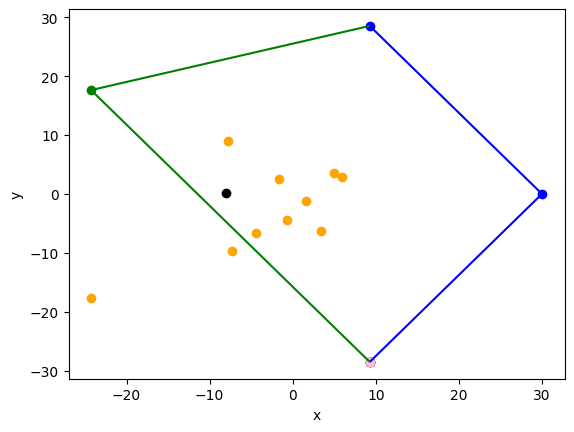

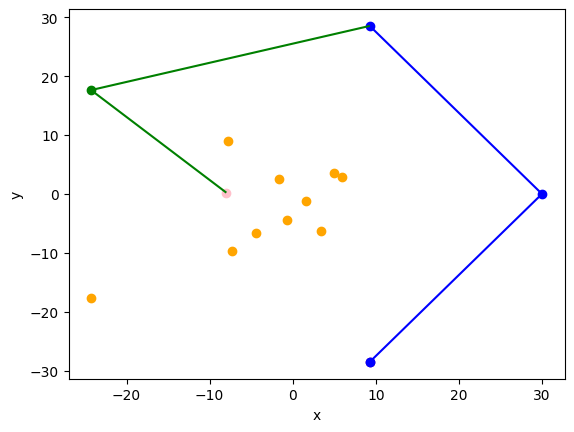

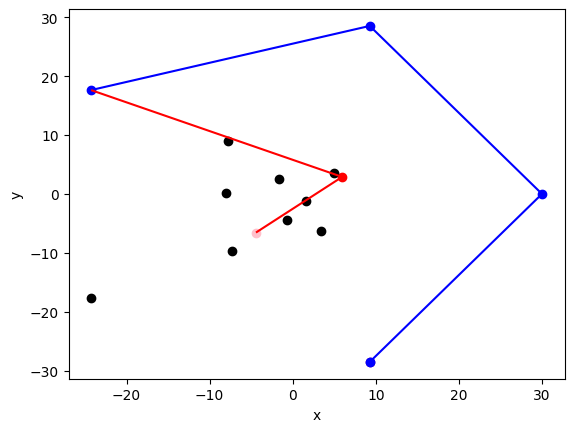

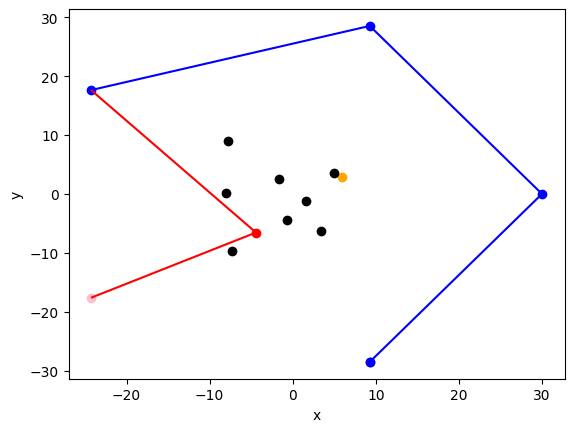

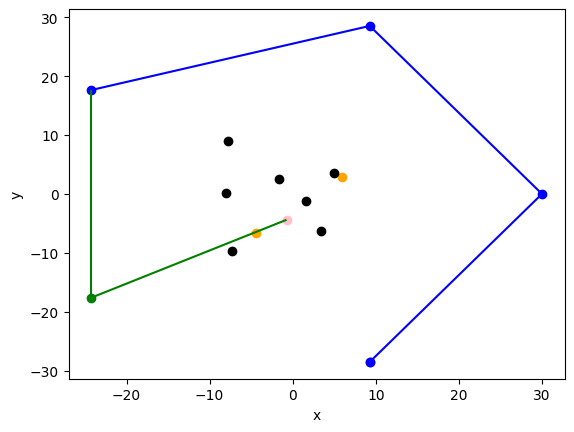

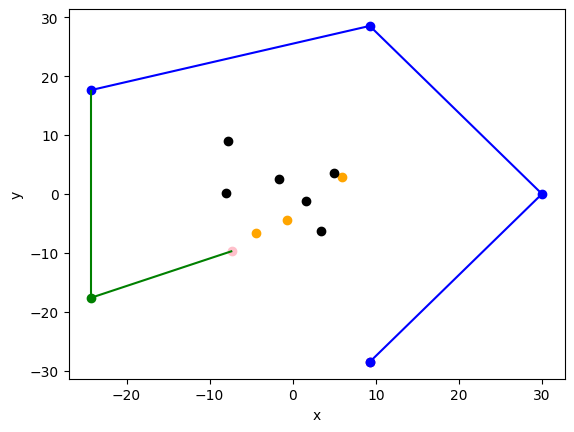

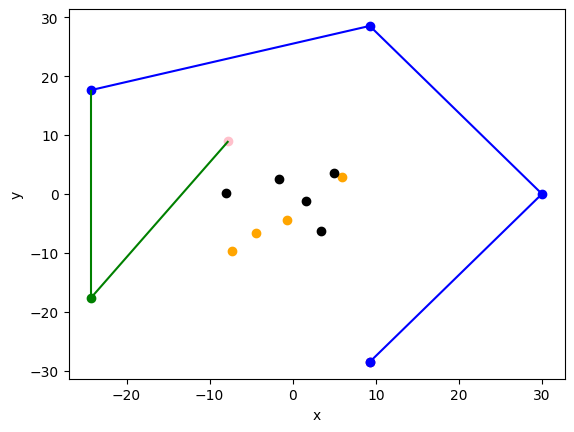

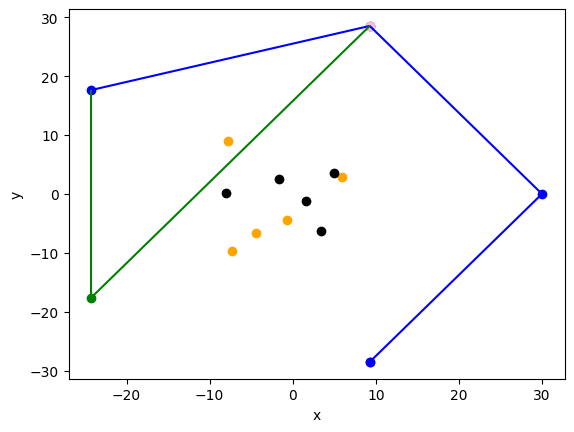

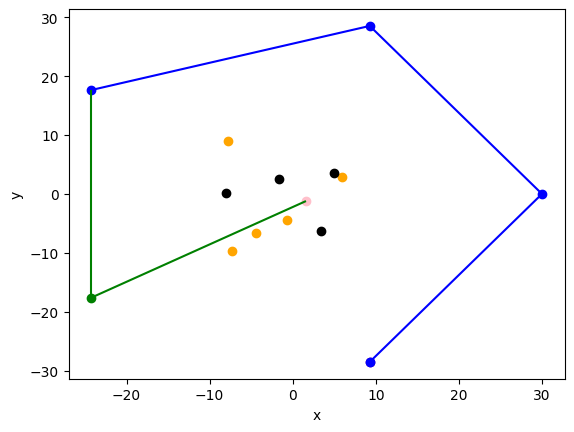

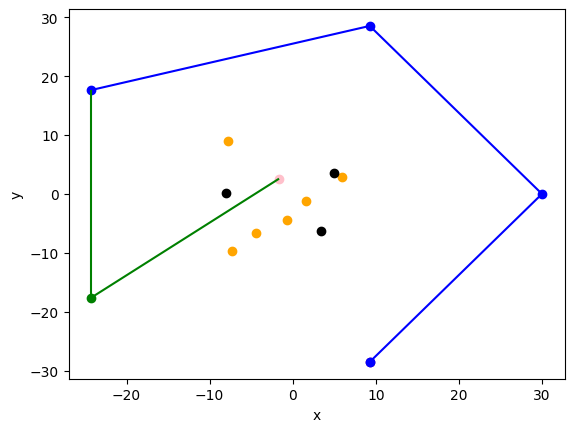

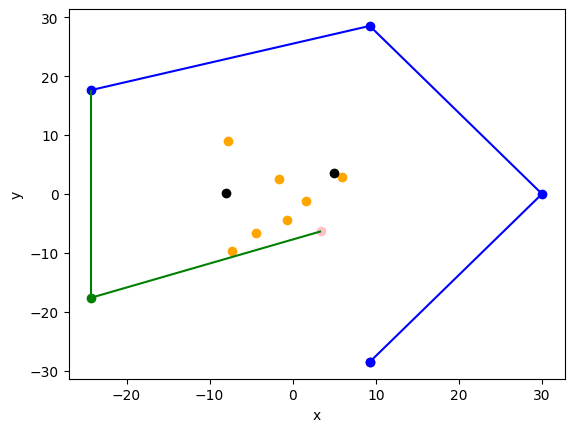

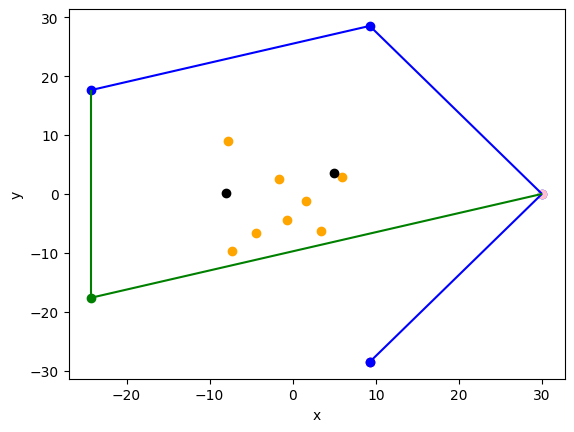

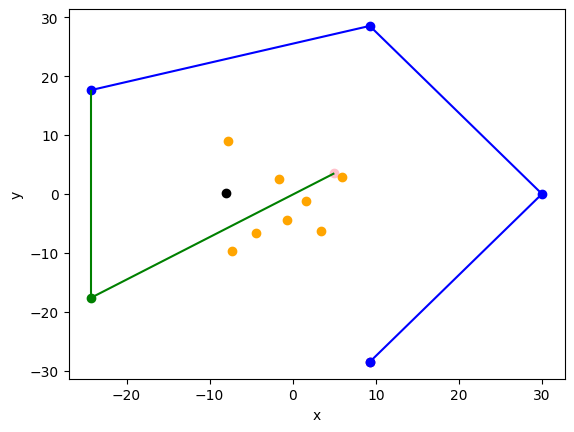

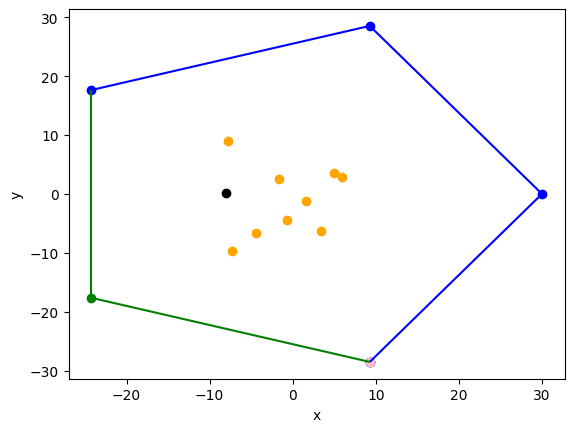

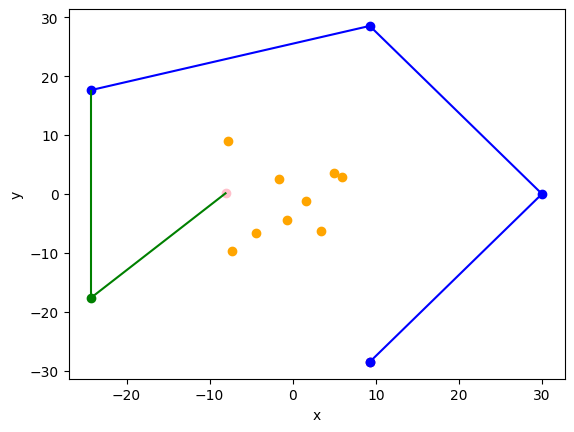

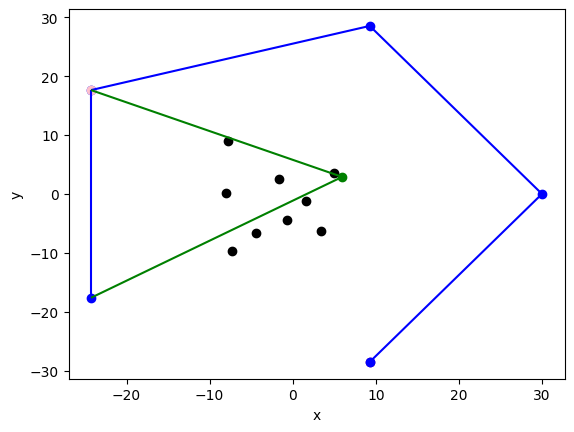

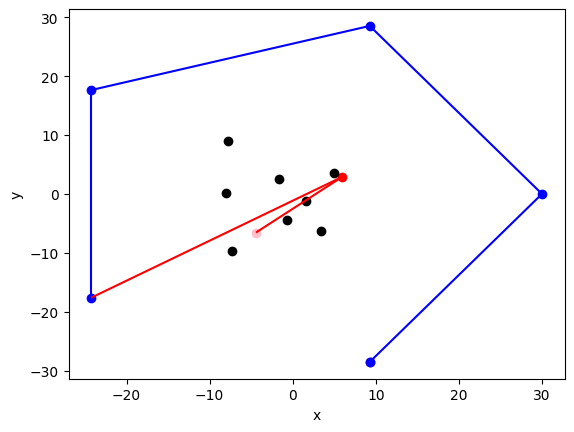

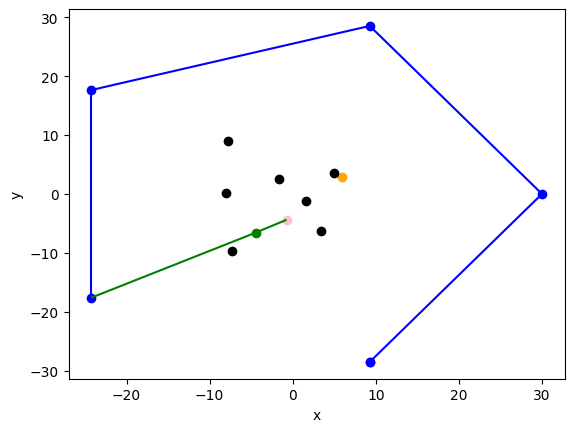

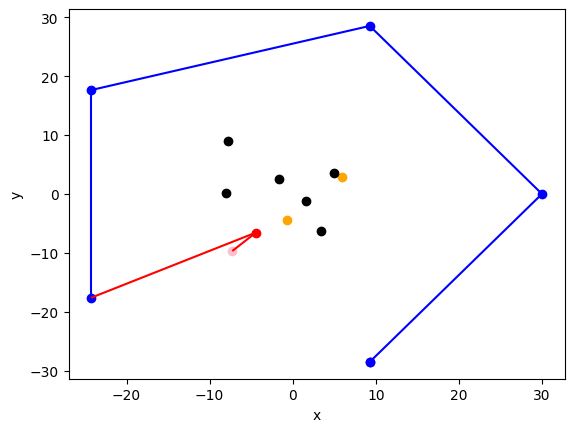

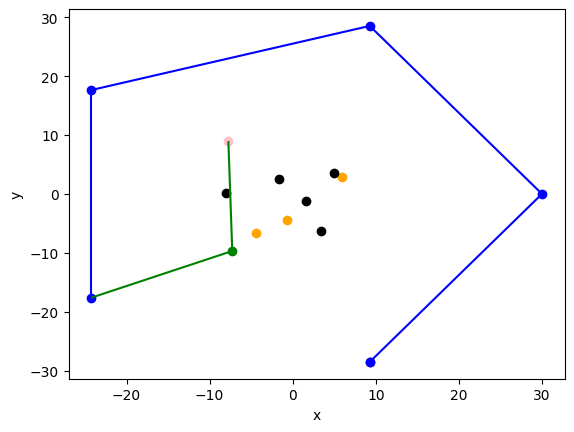

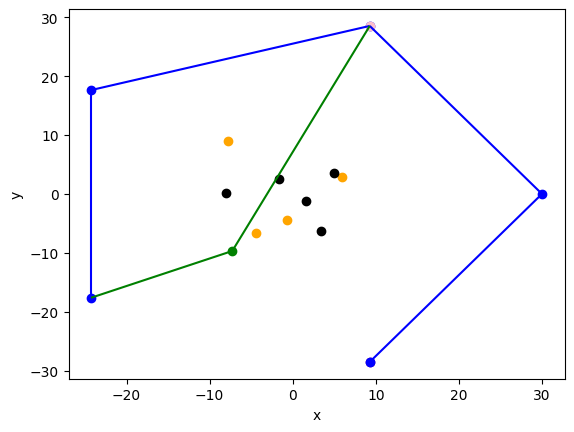

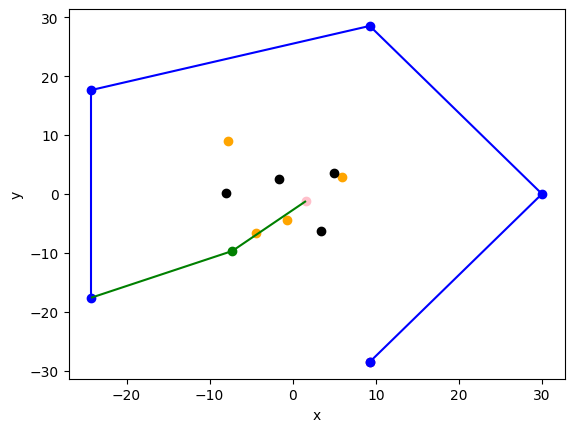

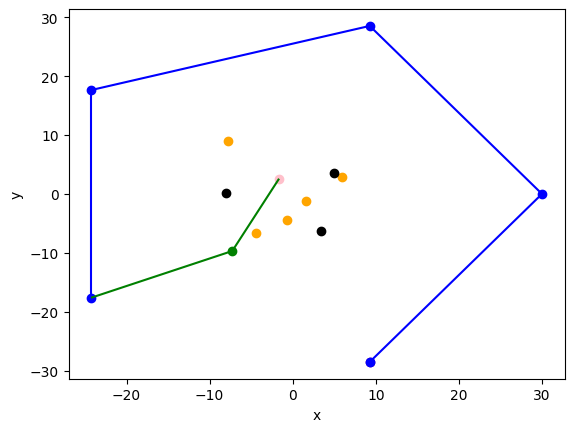

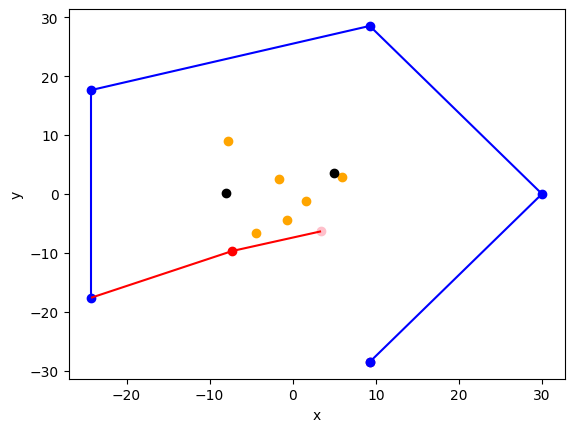

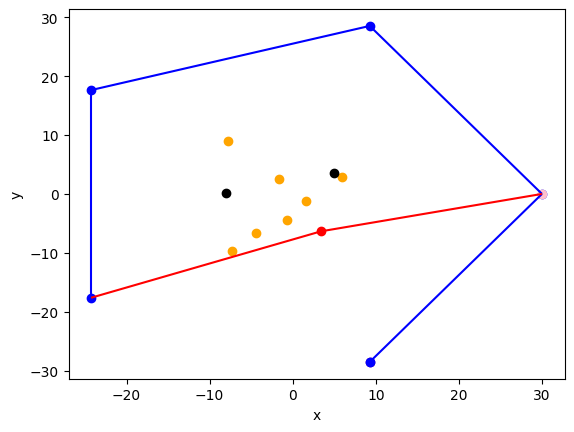

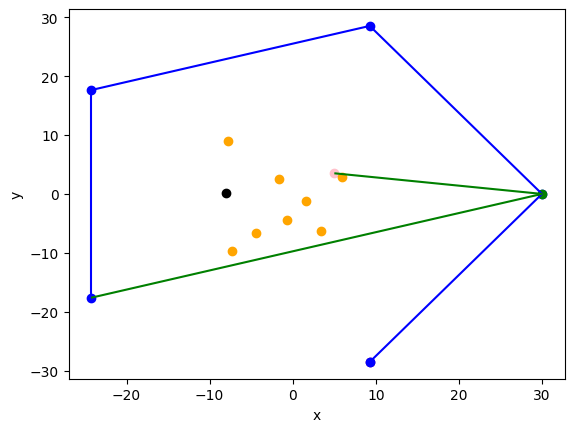

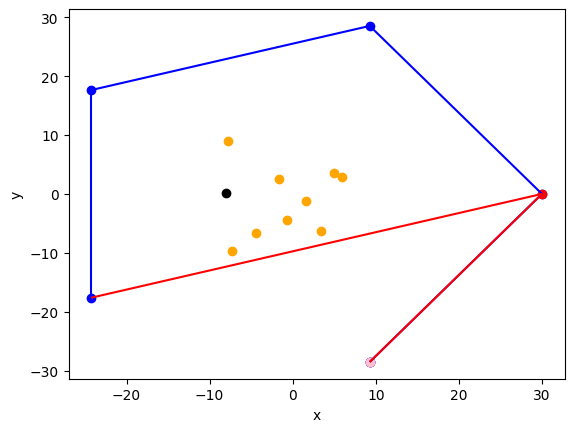

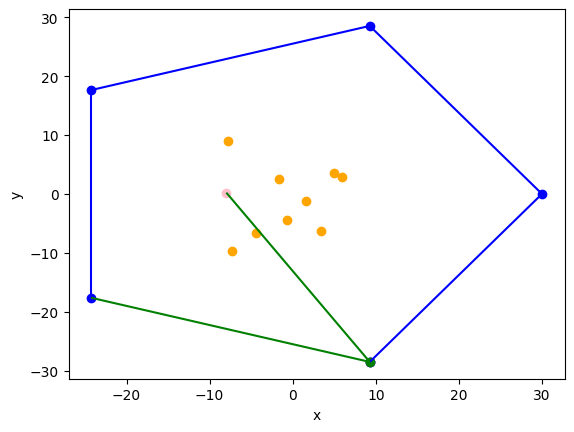

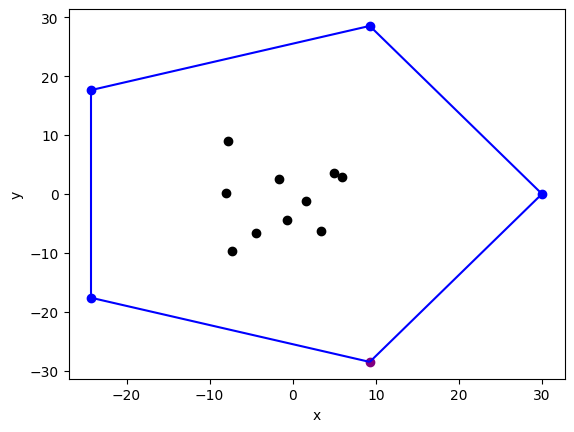

In [130]:
jarvis_algorithm_draw(set_convex_hull())

## Algorytm przyrostowy

In [133]:
def incremental_algorithm(Q):

    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

In [ ]:
Test().runtest(2, incremental_algorithm)

In [ ]:
def incremental_algorithm_draw(Q):
    
   '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''

In [ ]:
incremental_algorithm_draw(set_convex_hull())

## Algorytm górnej i dolnej otoczki

In [ ]:
def andrews_monotone_chain_algorithm(Q):

    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

In [ ]:
Test().runtest(2, andrews_monotone_chain_algorithm)

In [ ]:
def andrews_monotone_chain_algorithm_draw(Q):
    
   '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''

In [ ]:
andrews_monotone_chain_algorithm_draw(set_convex_hull())

## Algorytm Quickhull

In [ ]:
def quickhull_algorithm(Q):

    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

In [ ]:
Test().runtest(2, quickhull_algorithm)

In [ ]:
def quickhull_algorithm_draw(Q):
    
   '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''

In [ ]:
quickhull_algorithm_draw(set_convex_hull())

## Algorytm dziel i rządź

In [ ]:
def divide_and_conquer_algorithm(Q):

    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

In [ ]:
Test().runtest(2, divide_and_conquer_algorithm)

In [ ]:
def divide_and_conquer_algorithm_draw(Q):
    
   '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''

In [ ]:
divide_and_conquer_algorithm_draw(set_convex_hull())

## Algorytm Chan'a

In [ ]:
def chan_algorithm(Q):

    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

In [ ]:
Test().runtest(2, chan_algorithm)

In [ ]:
def chan_algorithm_draw(Q):
    
   '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''

In [ ]:
chan_algorithm_draw(set_convex_hull())

# Porównanie czasu działania algorytmów

Porównnie czasu działania funkcji wyznaczającej orienację punktu względem prostej na punktach typu float z punktami typu Decimal posiadająe precyzją do 64 miejsc po przecinku

In [68]:
def orient_decimal (a,b,c):
    eps=eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1

def orient_float (a,b,c):
    eps=eps=1e-8
    det=(b[0]-a[0])*(c[1]-b[1])-(b[1]-a[1])*(c[0]-b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


a=(1,1)
b=(1,2)
c=(2,3)
time_decimal=0
time_float=0
for i in range (int(1e6)):
    start_time_decimal = time.time()
    _ = orient_decimal(a,b,c)
    end_time_decimal = time.time()
    time_decimal += end_time_decimal - start_time_decimal
    start_time_float = time.time()
    _ = orient_float(a,b,c)
    end_time_float = time.time()
    time_float += end_time_float - start_time_float

table_orient = pd.DataFrame([time_decimal,time_float], index=["Decimal","Float"], columns=["Czas"])
display (table_orient)

,Czas
Decimal,3.329203
Float,0.600911
